In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

In [54]:
dataset=pd.read_csv('x_final_csv.csv')
dataset

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Condition
0,0.142599,365.0,366,1.425985,2.033434,-0.897223,-0.105681,6,362,368,36513,100,Good
1,0.126027,368.0,368,1.260271,1.588283,-0.395387,0.265678,5,366,371,36826,100,Good
2,0.097333,371.0,371,0.973331,0.947374,-0.400559,-0.177908,4,369,373,37089,100,Good
3,0.099372,373.0,373,0.993718,0.987475,-0.824843,0.072199,4,371,375,37332,100,Good
4,0.094554,376.0,376,0.945537,0.894040,-0.187940,-0.205709,5,373,378,37557,100,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.069559,325.0,330,10.695586,114.395556,0.435310,-0.668873,54,290,344,32322,100,Crater wear
296,1.131819,324.5,327,11.318190,128.101414,-0.008641,-0.555331,53,291,344,32314,100,Crater wear
297,1.137146,316.5,316,11.371464,129.310202,-0.046520,-0.069875,56,285,341,31677,100,Crater wear
298,1.971869,344.5,346,19.718688,388.826667,-0.073315,-1.185157,74,283,357,33304,100,Crater wear


In [55]:
x=dataset.iloc[:,0:12].values
y=dataset.iloc[:,12].values

In [56]:
x

array([[1.42598539e-01, 3.65000000e+02, 3.66000000e+02, ...,
        3.68000000e+02, 3.65130000e+04, 1.00000000e+02],
       [1.26027093e-01, 3.68000000e+02, 3.68000000e+02, ...,
        3.71000000e+02, 3.68260000e+04, 1.00000000e+02],
       [9.73331260e-02, 3.71000000e+02, 3.71000000e+02, ...,
        3.73000000e+02, 3.70890000e+04, 1.00000000e+02],
       ...,
       [1.13714644e+00, 3.16500000e+02, 3.16000000e+02, ...,
        3.41000000e+02, 3.16770000e+04, 1.00000000e+02],
       [1.97186883e+00, 3.44500000e+02, 3.46000000e+02, ...,
        3.57000000e+02, 3.33040000e+04, 1.00000000e+02],
       [9.61633809e-01, 3.47500000e+02, 3.48000000e+02, ...,
        3.58000000e+02, 5.57700000e+03, 1.60000000e+01]])

In [57]:
y

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
     

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y1=encoder.fit_transform(y)
y2=pd.get_dummies(y1).values

In [59]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3,shuffle=True,random_state=20)

In [60]:
i=1
for train_index,test_index in skf.split(x,y1):
    print("fold",i)
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y2[train_index],y2[test_index]
    print(x_train,"having:",len(x_train))
    print(x_test,"having:",len(x_test))
    print("--------------------------")
    i+=1

fold 1
[[9.45537100e-02 3.76000000e+02 3.76000000e+02 ... 3.78000000e+02
  3.75570000e+04 1.00000000e+02]
 [9.36089010e-02 3.79500000e+02 3.79000000e+02 ... 3.82000000e+02
  3.79550000e+04 1.00000000e+02]
 [8.56289860e-02 3.81000000e+02 3.82000000e+02 ... 3.83000000e+02
  3.81290000e+04 1.00000000e+02]
 ...
 [1.13181895e+00 3.24500000e+02 3.27000000e+02 ... 3.44000000e+02
  3.23140000e+04 1.00000000e+02]
 [1.13714644e+00 3.16500000e+02 3.16000000e+02 ... 3.41000000e+02
  3.16770000e+04 1.00000000e+02]
 [1.97186883e+00 3.44500000e+02 3.46000000e+02 ... 3.57000000e+02
  3.33040000e+04 1.00000000e+02]] having: 200
[[1.42598539e-01 3.65000000e+02 3.66000000e+02 ... 3.68000000e+02
  3.65130000e+04 1.00000000e+02]
 [1.26027093e-01 3.68000000e+02 3.68000000e+02 ... 3.71000000e+02
  3.68260000e+04 1.00000000e+02]
 [9.73331260e-02 3.71000000e+02 3.71000000e+02 ... 3.73000000e+02
  3.70890000e+04 1.00000000e+02]
 ...
 [1.00099748e+00 3.20000000e+02 3.21000000e+02 ... 3.38000000e+02
  3.19320000e

In [61]:
y

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
       'Notch wear', 'Notch wear', 'Notch wear', 'Notch wear',
     

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [63]:
import tensorflow as tf
from tensorflow import keras

In [65]:
model=keras.Sequential()
model.add(keras.layers.Dense(6,input_shape=(12,),kernel_initializer='he_uniform',activation='relu'))
model.add(keras.layers.Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
model.add(keras.layers.Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
model.add(keras.layers.Dense(units=6,kernel_initializer='glorot_uniform',activation='sigmoid'))

model.compile(optimizer='adam',
               loss='categorical_crossentropy',
                metrics=['accuracy'])

model_history=model.fit(x_train, y_train, epochs=20)

Epoch 1/20
7/7 [==============================] - 0s 998us/step - loss: 1.9395 - accuracy: 0.1115
Epoch 2/20
7/7 [==============================] - 0s 2ms/step - loss: 1.9096 - accuracy: 0.1293
Epoch 3/20
7/7 [==============================] - 0s 831us/step - loss: 1.8632 - accuracy: 0.1475
Epoch 4/20
7/7 [==============================] - 0s 997us/step - loss: 1.8443 - accuracy: 0.1527
Epoch 5/20
7/7 [==============================] - 0s 999us/step - loss: 1.7895 - accuracy: 0.1818
Epoch 6/20
7/7 [==============================] - 0s 997us/step - loss: 1.8478 - accuracy: 0.1928
Epoch 7/20
7/7 [==============================] - 0s 1ms/step - loss: 1.7829 - accuracy: 0.1815
Epoch 8/20
7/7 [==============================] - 0s 831us/step - loss: 1.7716 - accuracy: 0.2257
Epoch 9/20
7/7 [==============================] - 0s 1ms/step - loss: 1.7382 - accuracy: 0.2430
Epoch 10/20
7/7 [==============================] - 0s 890us/step - loss: 1.6823 - accuracy: 0.2799
Epoch 11/20
7/7 [========

In [16]:
  print('Model evaluation ',model.evaluate(x_test,y_test))

4/4 [==============================] - 0s 967us/step - loss: 1.4105 - accuracy: 0.8700
Model evaluation  [1.4105018377304077, 0.8700000047683716]


In [17]:
y_pred=model.predict(x_test)
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.93      0.88      0.90        16
           2       0.86      0.75      0.80        16
           3       0.84      0.94      0.89        17
           4       0.80      0.94      0.86        17
           5       1.00      0.88      0.94        17

    accuracy                           0.87       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



Text(69.0, 0.5, 'Truth')

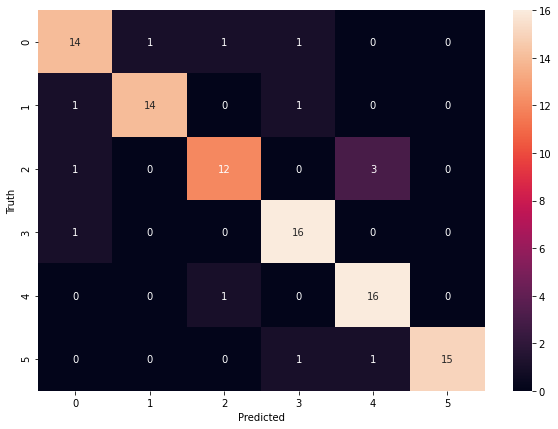

In [20]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test_class,predictions=y_pred_class)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
#Accuracy
acc=(14+14+12+16+16+15)/(17+16+16+17+17+17)
acc

0.87